In [1]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)
    
    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 22, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

def writeMultipleImages(imgsArray, titlesArray, name):
    index = 0
    for img, title in zip(imgsArray, titlesArray):
        index += 1
        cv2.imwrite(f'{name}_{index}_{title}.tif', img)

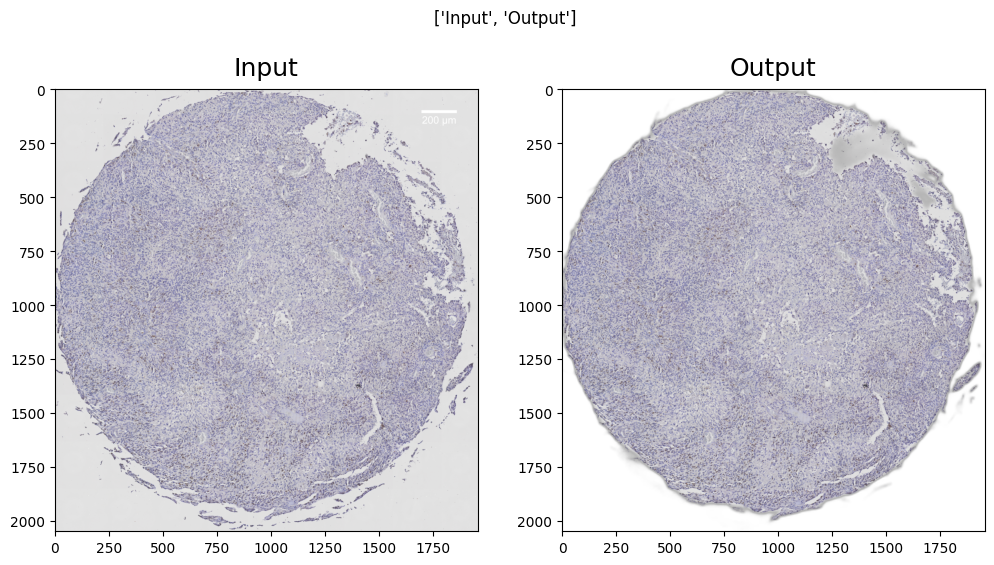

In [2]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
import cv2


img_path = 'cel.tif'
img_output = 'demo_cel.tif'

input_image = Image.open(img_path)
output_image = remove(input_image)
output_image.save(img_output)

imgs_array = [input_image, output_image]
titlesArray = ['Input', 'Output']
showMultipleImages(imgs_array, titlesArray, (12, 8), 2, 1)


Largura da imagem: 1958
Altura da imagem: 2048


Área: 2969384


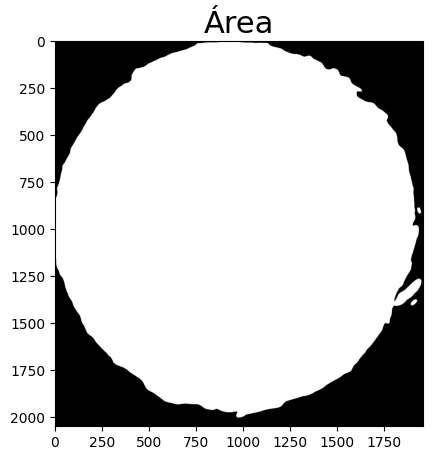

In [3]:
import cv2 as cv
import numpy as np

im = cv.imread('demo_cel.tif')

print('Largura da imagem:', im.shape[1])
print('Altura da imagem:', im.shape[0])
print('\n')

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Aplica o desfoque
#print('Desfoque...')
blur = cv.blur(imgray, (15, 15))

# Aplica o threshold (limite)
#print('Limite...')
ret, thresh = cv.threshold(blur, 10, 255, cv.THRESH_BINARY)

# Encontra os contornos
#print('Contorno...')
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Cria uma máscara preta do mesmo tamanho da imagem original
mask = np.zeros(im.shape[:2], dtype=np.uint8)

# Preenche a máscara com os contornos
cv.drawContours(mask, contours, -1, (255), thickness=cv.FILLED)

# Conta o número de pixels brancos (valor 255) na máscara
pixel_count = cv.countNonZero(mask)

print(f"Área: {pixel_count}")

showSingleImage(mask, 'Área', (5, 5))

Azul: 23494 //// Marrom: 2065
Azul : 9197 //// Marrom: 254


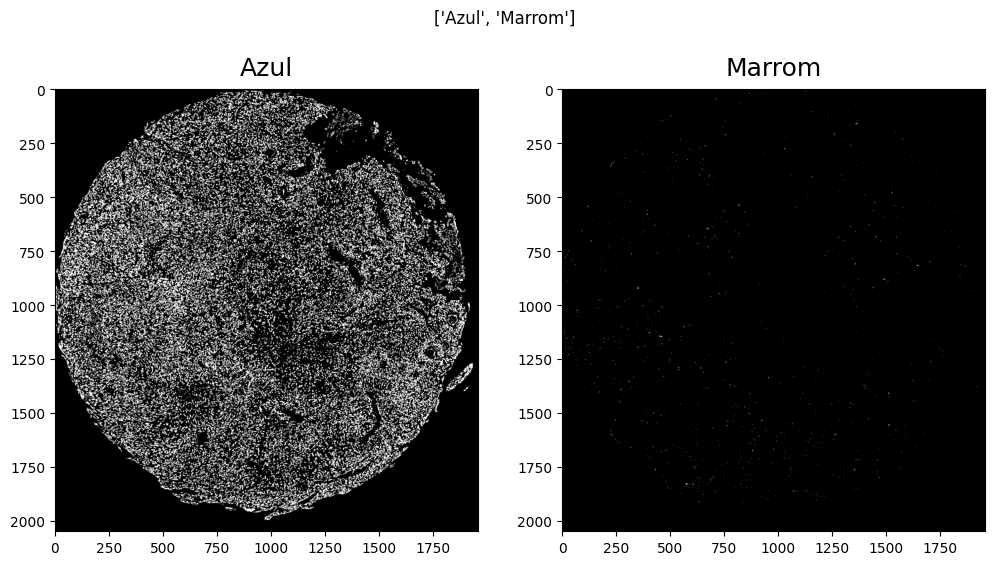

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from cv2 import imshow

def contagem(image, lhue, lsaturation, lvalue, uhue, usaturation, uvalue):
    # Carregar a imagem processada sem fundo
    imagem = cv2.imread(image)

    # Converter a imagem para o espaço de cor HSV
    hsv_image = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

    # Ajustar limites para a cor
    lower = np.array([lhue, lsaturation, lvalue])  # Limite inferior ajustado
    upper = np.array([uhue, usaturation, uvalue])  # Limite superior ajustado

    # Criar a máscara para os biomarcadores marrons
    mask = cv2.inRange(hsv_image, lower, upper)
    img = cv2.bitwise_and(hsv_image, hsv_image, mask=mask)

    # Encontrar contornos na máscara redimensionada
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Contar o número de contornos (pontos distintos)
    num_points_brown = len(contours)
    return num_points_brown, mask
    

azul, img_azul = contagem('out.tif', 100, 30, 30, 285, 250, 250)
marrom, img_marrom = contagem('out.tif', 1, 10, 10, 39, 170, 170)
print(f"Azul: {azul} //// Marrom: {marrom}")
print(f"Azul : 9197 //// Marrom: 254")

imgs_array = [img_azul, img_marrom]
titlesArray = ['Azul', 'Marrom']

showMultipleImages(imgs_array, titlesArray, (12, 8), 2, 1)
writeMultipleImages(imgs_array, titlesArray, name = 'contagem')

IndexError: index 2 is out of bounds for axis 0 with size 2

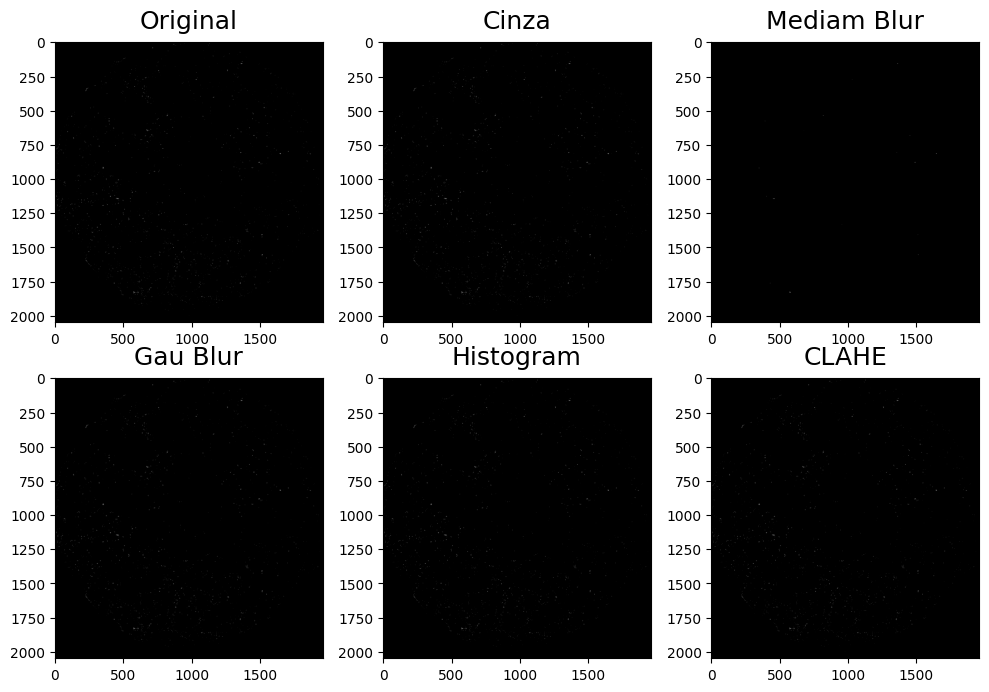

In [20]:
import cv2
import numpy as np

img = cv2.imread("contagem_2_Marrom.tif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur_mid = cv2.medianBlur(gray, 5)
blur_gau = cv2.GaussianBlur(gray, (5, 5), 0)
hist_norm = cv2.equalizeHist(gray)

clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(5, 5))
clahe_img = clahe.apply(gray)

edge = cv2.Canny(gray, 50, 150)


imgs_array = [img, gray, blur_mid, blur_gau, hist_norm, clahe_img, edge]
titles_array = [ 'Original', 'Cinza', 'Mediam Blur', 'Gau Blur', 'Histogram' ,'CLAHE', 'Edge']


#writeMultipleImages(imgs_array, titles_array, name = 'comp')
showMultipleImages(imgs_array, titles_array, (12, 8), 4, 2)

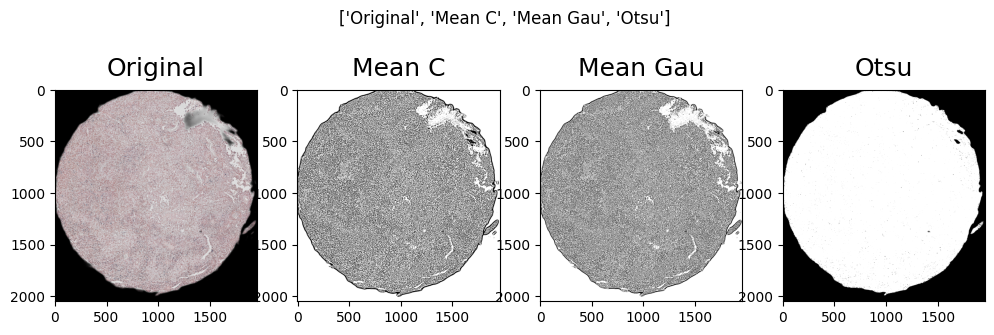

In [99]:
import cv2
import numpy as np

img = cv2.imread("out.tif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
kernel = np.ones((5, 5), np.uint8)

dilation = cv2.dilate(gray, kernel, iterations=1)

closing = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)

thresh_meanC = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

thresh_meanGau = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

ret, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

imgs_array = [img, thresh_meanC, thresh_meanGau, thresh_otsu]
titles_array = [ 'Original', 'Mean C', 'Mean Gau', 'Otsu']

writeMultipleImages(imgs_array, titles_array)
showMultipleImages(imgs_array, 
titles_array, (12, 8), 4, 1)

In [27]:
import cv2
import numpy as np

img = cv2.imread("4_Otsu.tif")
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cell_count, x_count, y_count = [], [], []
circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1.2, 20, param1= 50, param2= 28, minRadius=1, maxRadius=20)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 170, 0), 2)
        cv2.rectangle(image, (x - 2, y - 2), (x + 2, y + 2), (0, 128, 255), - 1)
        cell_count.append(r)
        x_count.append(x)
        y_count.append(y)
    showSingleImage(image, "Células", (5, 5))
    cv2.imwrite("Contours.tif", image)


print(len(cell_count))


0
